<a href="https://colab.research.google.com/github/leovcunha/titanic-ml-from-disaster/blob/master/titanic-ml-disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
titanic = sns.load_dataset('titanic')
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [0]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
titanic.head(8)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


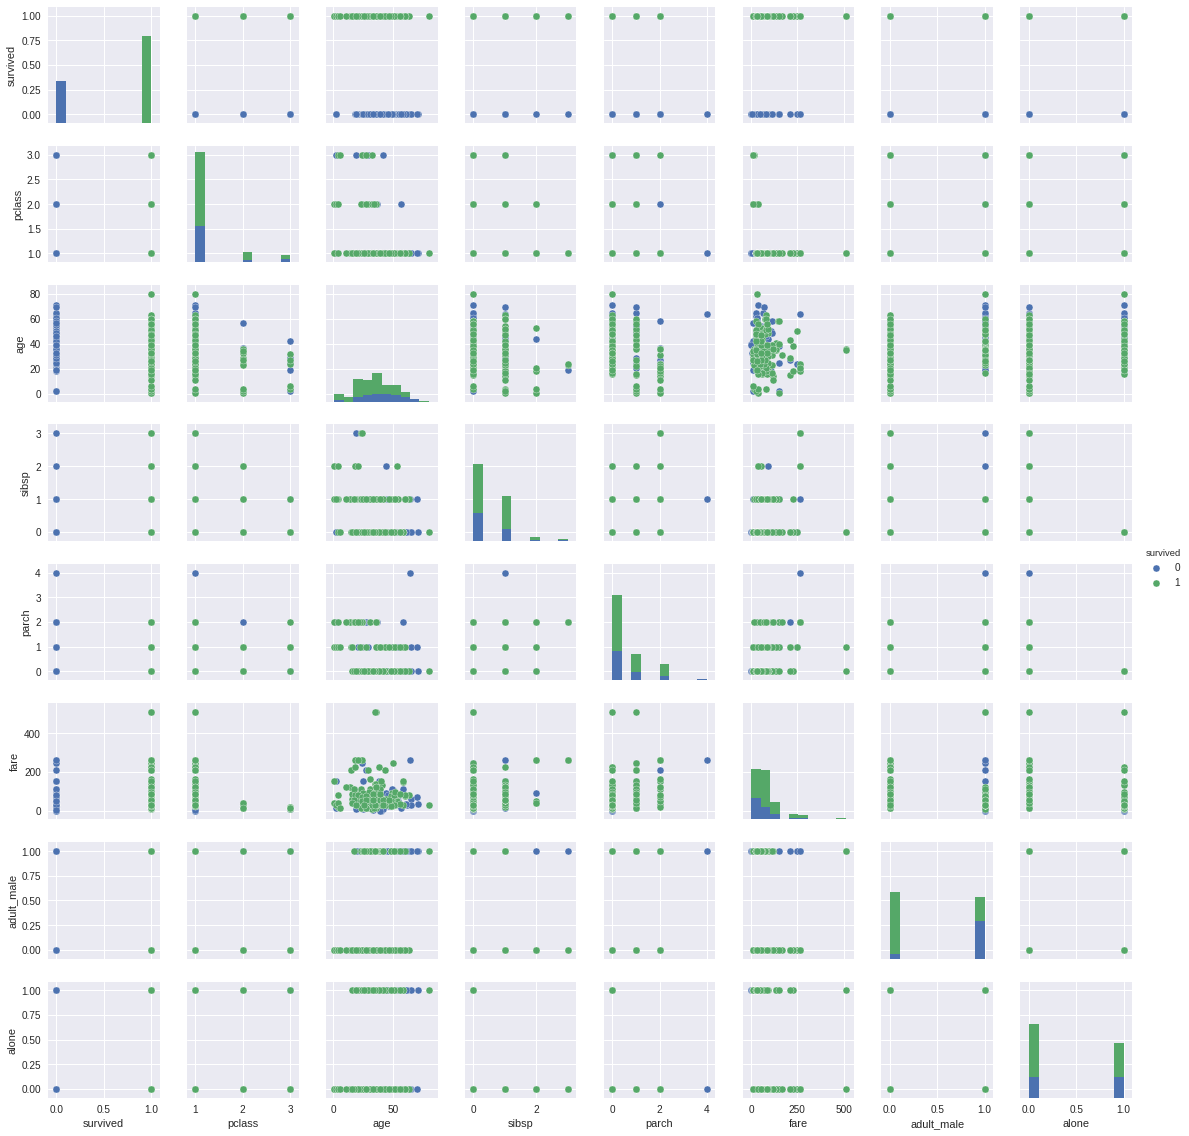

In [0]:
sns.pairplot(titanic.dropna(), hue='survived', size=2)

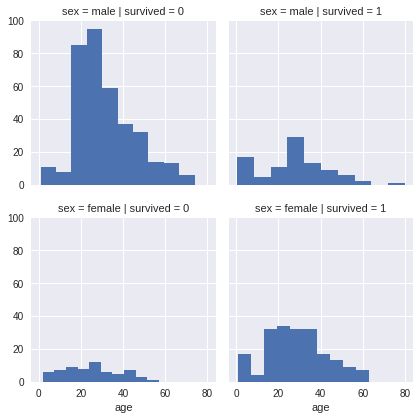

In [0]:
g = sns.FacetGrid(titanic, col="survived", row="sex")
g = g.map(plt.hist,"age")

Values missing:

In [0]:
total = titanic.isnull().sum().sort_values(ascending=False)
print(total)

deck           688
age            177
embark_town      2
embarked         2
alone            0
alive            0
adult_male       0
who              0
class            0
fare             0
parch            0
sibsp            0
sex              0
pclass           0
survived         0
dtype: int64


In [0]:
titanic2 = titanic.drop(['deck','embark_town', 'alone', 'alive', 'who', 'class', 'adult_male'],axis=1)
titanic2['age'].fillna(titanic2['age'].mean(),inplace=True)
titanic2['embarked'].fillna('S',inplace=True)
titanic2['fare'] = titanic2['fare'].fillna(0)
titanic2['fare'] = titanic2['fare'].astype(int)
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
survived    891 non-null int64
pclass      891 non-null int64
sex         891 non-null object
age         891 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
fare        891 non-null int64
embarked    891 non-null object
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [0]:
titanic_dict = titanic2.to_dict('records')
vec = DictVectorizer(sparse=False, dtype=int)
l = vec.fit_transform(titanic_dict)
titanic_pp = pd.DataFrame(l, columns=vec.get_feature_names())
titanic_pp.head()

,age,embarked=C,embarked=Q,embarked=S,fare,parch,pclass,sex=female,sex=male,sibsp,survived
0,22,0,0,1,7,0,3,0,1,1,0
1,38,1,0,0,71,0,1,1,0,1,1
2,26,0,0,1,7,0,3,1,0,0,1
3,35,0,0,1,53,0,1,1,0,1,1
4,35,0,0,1,8,0,3,0,1,0,0


In [0]:
y = titanic_pp['survived']
X = titanic_pp.drop(['survived'], axis=1)
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  test_size=0.3)

In [0]:
logreg = LogisticRegression()
logreg.fit(X1, y1)


scores = cross_val_score(logreg, X, y, cv=5)
scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

array([0.78212291, 0.79329609, 0.78089888, 0.76966292, 0.82485876])

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LogisticRegression(**kwargs))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceW

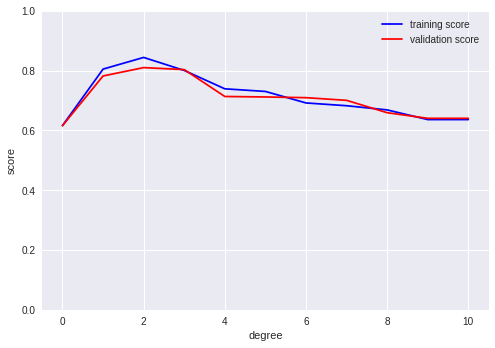

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceW

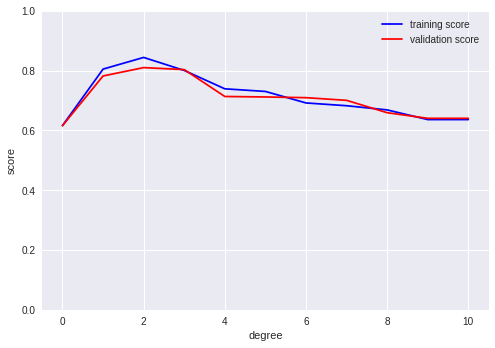

In [0]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 11)
train_score, val_score = validation_curve(PolynomialRegression('liblinear'), X, y,
                                          'polynomialfeatures__degree', degree, cv=5)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


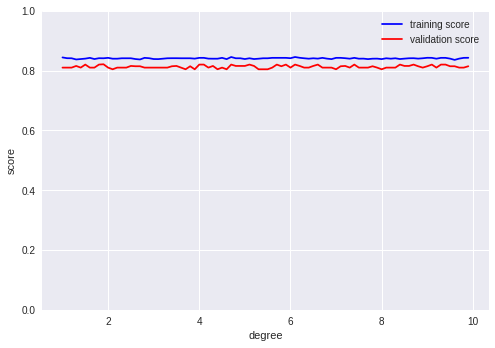

In [80]:
C = np.arange(1,10, 0.1)
train_score, val_score = validation_curve(PolynomialRegression(solver='liblinear'), X, y,
                                          'logisticregression__C', C, cv=5)

plt.plot(C, np.median(train_score, 1), color='blue', label='training score')
plt.plot(C, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [0]:
X_test = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/test.csv')
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
X_test2 = X_test.drop(['Cabin','Ticket', 'Name', 'PassengerId'],axis=1)
X_test2['Age'].fillna(titanic2['age'].mean(),inplace=True)
X_test2['Embarked'].fillna('S',inplace=True)
X_test2['Fare'] = X_test2['Fare'].fillna(0)
X_test2['Fare'] = X_test2['Fare'].astype(int)
X_test2.columns = pd.Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked' ])
X_test2_dict = X_test2.to_dict('records')
vec = DictVectorizer(sparse=False, dtype=int)
l = vec.fit_transform(X_test2_dict)
X_test2_pp = pd.DataFrame(l, columns=vec.get_feature_names())
X_test2_pp.head()

,age,embarked=C,embarked=Q,embarked=S,fare,parch,pclass,sex=female,sex=male,sibsp
0,34,0,1,0,7,0,3,0,1,0
1,47,0,0,1,7,0,3,1,0,1
2,62,0,1,0,9,0,2,0,1,0
3,27,0,0,1,8,0,3,0,1,0
4,22,0,0,1,12,1,3,1,0,1


In [79]:
model = PolynomialRegression(solver='liblinear',C=1.9).fit(X,y)
scores = cross_val_score(model, X, y, cv=5)
scores.mean()

0.8182393918405892

In [0]:
Y_test = model.predict(X_test2_pp)
Y_test

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [0]:
submission = pd.DataFrame({
        "PassengerId": X_test["PassengerId"],
        "Survived": Y_test
    })

    100% |████████████████████████████████| 993kB 19.6MB/s 


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
uploaded = drive.CreateFile({'title': 'submission.csv'})
uploaded.SetContentString(submission.to_csv(index=False))
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1BvF_asV-FY6rTTSff5qi-WNsO3qBBMyE
